# Face detection using pre-trained model

We use following blog as a reference:
[Face detection with OpenCV and deep learning](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)

Import required Python libraries

In [2]:

import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
!unzip -qq haar-face-detection.zip
%cd haar-face-detection

--2022-12-06 03:30:01--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.196.114, 52.218.176.113, 52.218.229.105, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.196.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184692 (2.1M) [application/zip]
Saving to: ‘haar-face-detection.zip’

haar-face-detection 100%[===================>]   2.08M  2.14MB/s    in 1.0s    

2022-12-06 03:30:03 (2.14 MB/s) - ‘haar-face-detection.zip’ saved [2184692/2184692]

/content/haar-face-detection


Start webcam

In [1]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Click 'Capture' to make photo using your webcam.

In [3]:
image_file = take_photo()

<IPython.core.display.Javascript object>

Read, resize and display the image. 

400 300


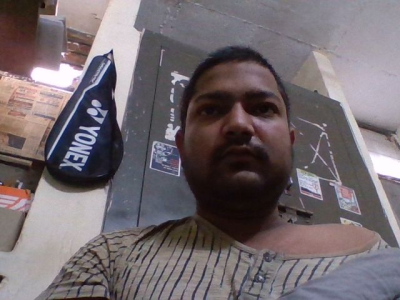

In [4]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
# img = cv2.imread('/content/portrait-white-man-isolated_53876-40306 (1).webp')
# print(img)
img = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
img = imutils.resize(img, width=400)
(h, w) = img.shape[:2]
print(w,h)
cv2_imshow(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

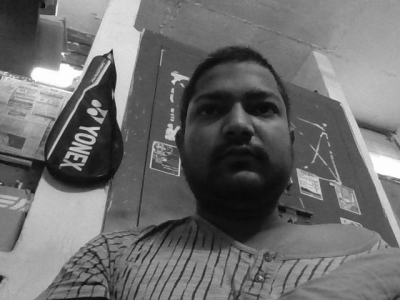

In [6]:
cv2_imshow(gray)

In [7]:
face_cascade = cv2.CascadeClassifier('/content/haar-face-detection/haarcascade_frontalface_default.xml')
faces_rect = face_cascade.detectMultiScale(gray, 1.1, 3)
print(len(faces_rect))



1


In [8]:
for(x,y,w,h) in faces_rect:
  cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0), thickness = 2)

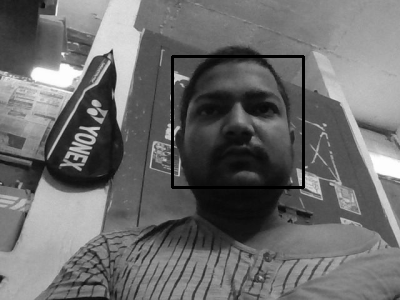

In [9]:
cv2_imshow(gray)